# Visualizing Probabilities with Python

This notebook demonstrates how to visualize probability distributions using Python's Matplotlib library. We'll cover:

1. Basic plotting techniques with Matplotlib
2. Visualizing coin flip probability distributions
3. Comparing different sample sizes
4. Working with frequency distributions

By the end of this notebook, you'll understand how to create clear, informative visualizations of probability distributions.

# Section 2: Plotting Proabilities using Matplotlib

In [23]:
## Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Matplotlib Operations

Let's start with the fundamentals of plotting using Matplotlib:
- Creating simple line plots
- Using scatter plots
- Adding labels and titles
- Basic plot customization

First, we'll import the required libraries:

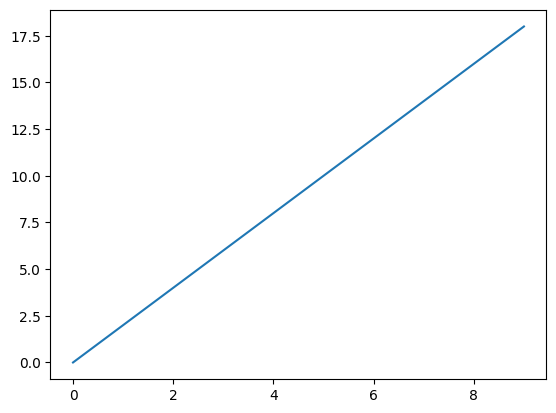

In [24]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

### Example 1: Basic Line Plot

Let's create a simple line plot showing y = 2x relationship:

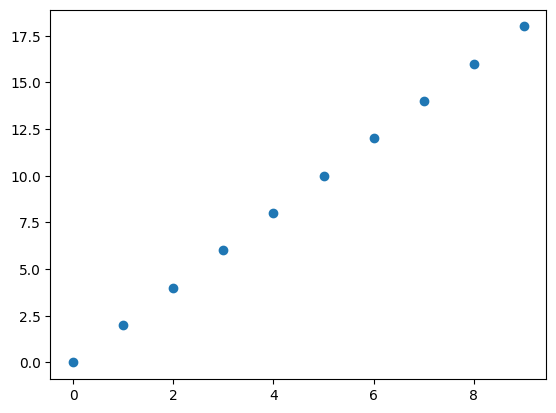

In [25]:
plt.scatter(x, y)
plt.show()

### Example 2: Scatter Plot

The same data can be visualized using scatter plots, which are useful for showing individual data points:

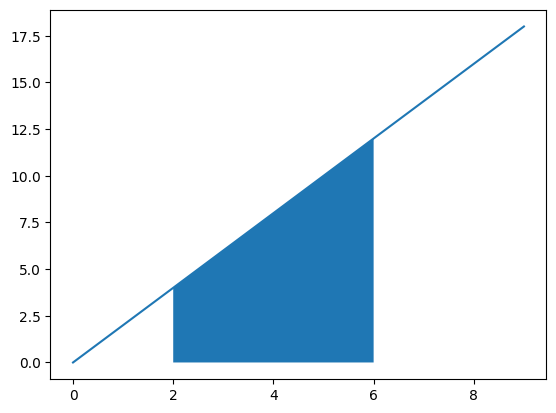

In [26]:
def is_in_interval(x, minimum, maximum):
    return minimum <= x <= maximum

plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

### Example 3: Highlighting Regions

We can highlight specific regions of interest using `fill_between`. This is particularly useful when visualizing probability intervals:

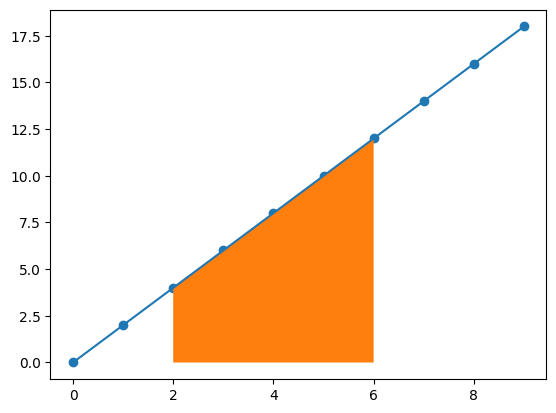

In [27]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

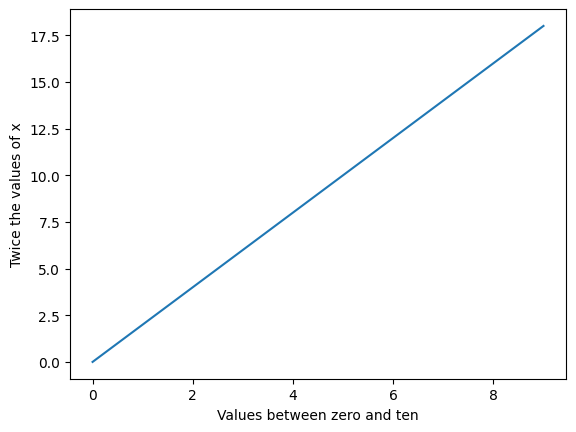

In [28]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

In [29]:
from itertools import product
from collections import defaultdict

## Probability Distribution Visualization

Now let's apply these plotting techniques to visualize probability distributions. We'll analyze:
1. The distribution of heads in coin flips
2. How the distribution changes with sample size
3. Different ways to represent the same probability data

First, let's import additional required libraries:

In [30]:
sample_space_10_flips = set(product(['Heads', 'Tails'], repeat=10))
weighted_sample_space = defaultdict(int) 
for outcome in sample_space_10_flips:
    n_heads = outcome.count('Heads')
    weighted_sample_space[n_heads] += 1

weighted_sample_space

defaultdict(int,
            {6: 210,
             7: 120,
             5: 252,
             4: 210,
             8: 45,
             3: 120,
             2: 45,
             9: 10,
             0: 1,
             1: 10,
             10: 1})

### Creating the Sample Space

We'll generate all possible outcomes for 10 coin flips and count the frequency of different numbers of heads:

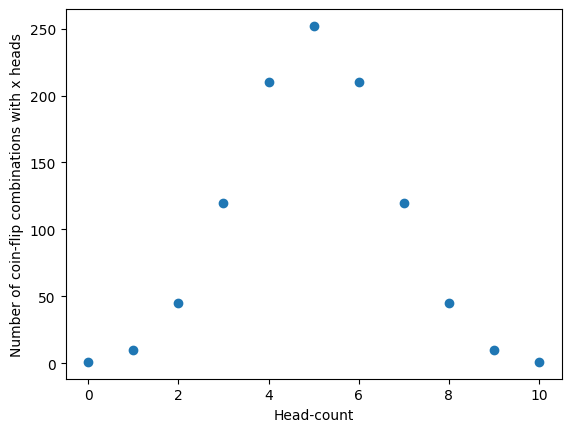

In [31]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

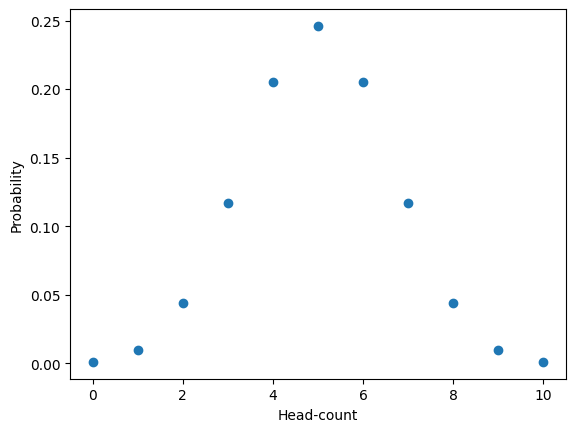

In [32]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

### Converting Frequencies to Probabilities

To convert our counts into probabilities, we divide each count by the total number of possible outcomes:

In [33]:
prob_x_10_flips

[0.205078125,
 0.1171875,
 0.24609375,
 0.205078125,
 0.0439453125,
 0.1171875,
 0.0439453125,
 0.009765625,
 0.0009765625,
 0.009765625,
 0.0009765625]

In [34]:
assert sum(prob_x_10_flips) == 1.0

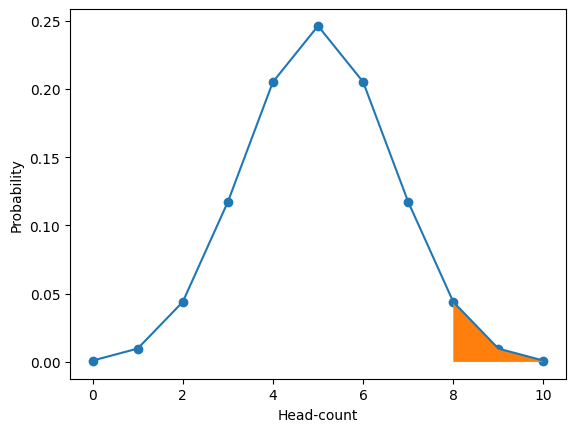

In [35]:
# Sort the x_10_flips and prob_x_10_flips for a smooth line plot
x_sorted, prob_sorted = zip(*sorted(zip(x_10_flips, prob_x_10_flips)))
plt.plot(x_sorted, prob_sorted)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
# The 'where' mask must match the x and y arrays passed to fill_between.
# Since you are plotting x_sorted and prob_sorted, create a new 'where_sorted' mask.
where_sorted = [is_in_interval(value, 8, 10) for value in x_sorted]
plt.fill_between(x_sorted, prob_sorted, where=where_sorted)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

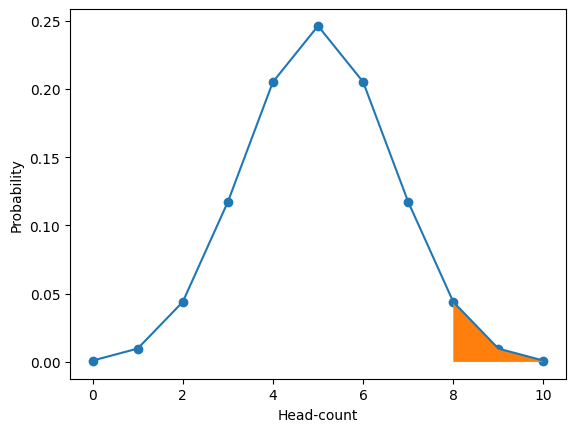

In [36]:
x_sorted, prob_sorted = zip(*sorted(zip(x_10_flips, prob_x_10_flips)))
plt.plot(x_sorted, prob_sorted)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
# The 'where' mask must match the x and y arrays passed to fill_between.
# Since you are plotting x_sorted and prob_sorted, create a new 'where_sorted' mask.
where_sorted = [is_in_interval(value, 8, 10) for value in x_sorted]
plt.fill_between(x_sorted, prob_sorted, where=where_sorted)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

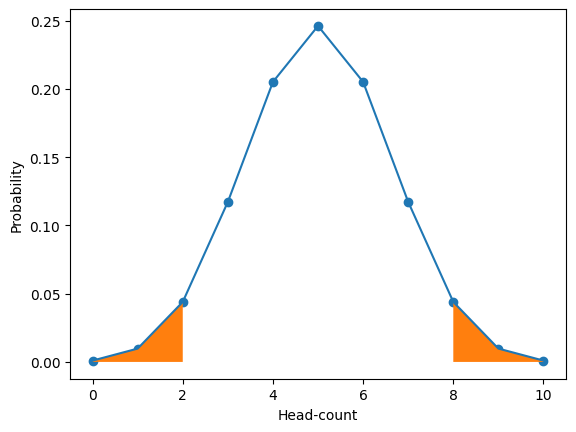

In [37]:
plt.plot(x_sorted, prob_sorted)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
# The 'where' mask must match the x and y arrays passed to fill_between.
# Since you are plotting x_sorted and prob_sorted, create a new 'where_sorted' mask.
where_sorted = [not is_in_interval(value, 3, 7) for value in x_sorted]
plt.fill_between(x_sorted, prob_sorted, where=where_sorted)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [55]:
def get_w_samplespace_nflips(nflips):
    possible_choices = ['Heads', 'Tails']
    sample_space = set(product(possible_choices, repeat = nflips))
    weighted_sample_space = defaultdict(int)
    for outcome in sample_space:
        n_heads = outcome.count('Heads')
        weighted_sample_space[n_heads] += 1
    return weighted_sample_space

weighted_sample_space_20_flips = get_w_samplespace_nflips(20)
weighted_sample_space_20_flips

defaultdict(int,
            {8: 125970,
             9: 167960,
             7: 77520,
             16: 4845,
             10: 184756,
             13: 77520,
             12: 125970,
             6: 38760,
             11: 167960,
             4: 4845,
             14: 38760,
             15: 15504,
             17: 1140,
             5: 15504,
             3: 1140,
             2: 190,
             1: 20,
             18: 190,
             19: 20,
             20: 1,
             0: 1})

## Comparing Different Sample Sizes

To understand how the number of coin flips affects the probability distribution, let's create a helper function that generates the weighted sample space for any number of flips:

In [39]:
from pprint import pprint

In [49]:
def generate_sorted_x_y(weighted_sample_space):
    x_n_flips = list(weighted_sample_space.keys())
    y_n_flips = [weighted_sample_space[key] for key in x_n_flips]
    sample_space_size = sum(weighted_sample_space.values())
    prob_n_flips = [value/sample_space_size for value in y_n_flips]
    x_sorted, prob_sorted = zip(*sorted(zip(x_n_flips, prob_n_flips)))
    return x_sorted, prob_sorted

In [50]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]
pprint(prob_x_20_flips)

[0.12013435363769531,
 0.16017913818359375,
 0.0739288330078125,
 0.004620552062988281,
 0.17619705200195312,
 0.0739288330078125,
 0.12013435363769531,
 0.03696441650390625,
 0.16017913818359375,
 0.004620552062988281,
 0.03696441650390625,
 0.0147857666015625,
 0.001087188720703125,
 0.0147857666015625,
 0.001087188720703125,
 0.0001811981201171875,
 1.9073486328125e-05,
 0.0001811981201171875,
 1.9073486328125e-05,
 9.5367431640625e-07,
 9.5367431640625e-07]


In [51]:
s = get_w_samplespace_nflips(10)
s

defaultdict(int,
            {6: 210,
             7: 120,
             5: 252,
             4: 210,
             8: 45,
             3: 120,
             2: 45,
             9: 10,
             0: 1,
             1: 10,
             10: 1})

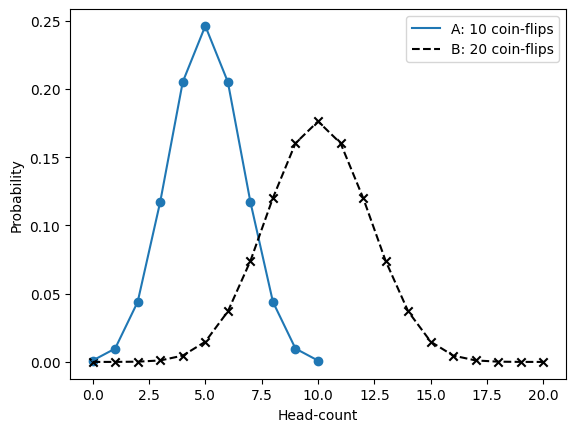

In [52]:
x_10_flips, prob_10_flips = generate_sorted_x_y(get_w_samplespace_nflips(10))
x_20_flips, prob_20_flips = generate_sorted_x_y(get_w_samplespace_nflips(20))
plt.plot(x_10_flips, prob_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_10_flips)
plt.plot(x_20_flips, prob_20_flips, color='black', linestyle='--',label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Comparing 10 vs 20 Coin Flips

Let's visualize how the probability distribution changes when we increase the number of coin flips from 10 to 20. Notice how the distribution becomes:
1. More spread out (wider range of possible outcomes)
2. More concentrated around the mean (closer to a normal distribution)
3. More symmetric

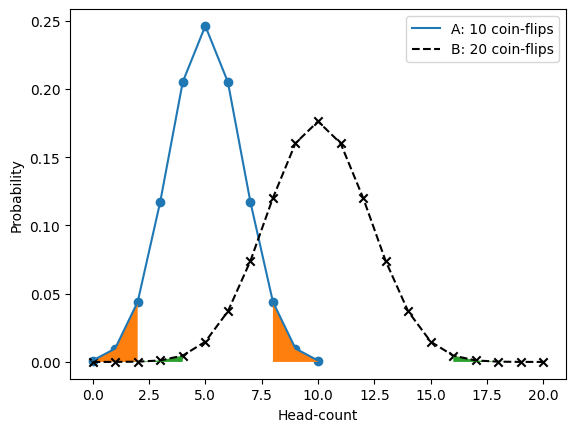

In [54]:
plt.plot(x_10_flips, prob_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_10_flips)
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_10_flips, where = where_10)
plt.plot(x_20_flips, prob_20_flips, color='black', linestyle='--',label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_20_flips, color='k', marker='x')
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_20_flips, where = where_20)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

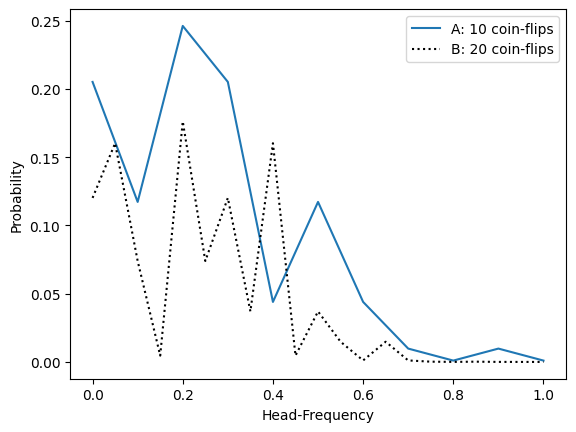

In [ ]:
x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':',
label='B: 20 coin-flips')
plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

### Analyzing Head Frequencies

Instead of looking at the raw counts of heads, we can analyze the frequency (proportion) of heads. This allows us to compare different sample sizes more directly:
- For 10 flips: frequency = heads/10
- For 20 flips: frequency = heads/20

This normalization helps us see the underlying patterns more clearly: